In [9]:
import tensorflow as tf

# Loading the data frame
### has a training set of 60,000 examples, and a test set of 10,000 examples

### MNIST dataset using the keras API

In [10]:
mnist = tf.keras.datasets.mnist # this basically handwritten characters


# After Loading rge MNIST data , divide into train and test datasets
### images are indeed square with 28×28 pixels
#### dataset is structured as a 3-dimensional array of instance, image width and image height

In [11]:
## unpacking the datatset into train and test datasets
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [12]:
x_train.shape

(60000, 28, 28)

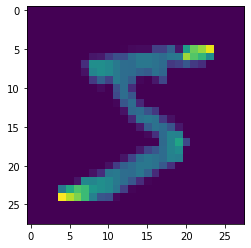

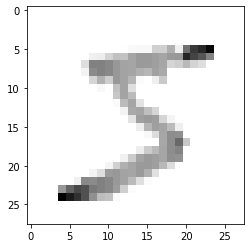

In [98]:
## just check the graph , how data look like 
import matplotlib.pyplot as plt  ## pip install 
plt.imshow(x_train[0])
plt.show()  ##in order to execute the graph
## however we don/t know whether its color image or binary image
## so inorder to plot it change the configuration 
plt.imshow(x_train[0], cmap = plt.cm.binary)

## check the value of each pixel
## before normalization

In [14]:
print (x_train[0])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## As image are in Gray level(1 channel ==> 0 to 255 ), not colered (RGB)
 ## Normalizing the data | pre- processing step
 ## built-in tf_utils.to_categorical() helper function in Keras.

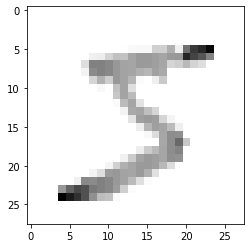

In [15]:
## you might have noticed that, its gray image and all value varies from 0 to 255
## in order to normalize.it
x_train = tf.keras.utils.normalize (x_train, axis = 1)
x_test = tf.keras.utils.normalize (x_test, axis = 1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

## After normalization

In [16]:
print (x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [17]:
print (y_train[0])

5


# Resizing image to make it suitable for apply convolution operation

In [18]:
import numpy as np ## pip install numpy
IMG_SIZE=28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE,1) ##increasing one dimension for kernal
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE,1) ## increasing one dimension for kernal operation
print ("Training Sample Dimension ", x_trainr.shape)
print ("Training Sample Dimension", x_testr.shape)

Training Sample Dimension  (60000, 28, 28, 1)
Training Sample Dimension (10000, 28, 28, 1)


## Creating a deep larning Neural Network
### Training on 60000 sample of MNIST handwritten dataset

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation , Flatten , Conv2D , MaxPooling2D

In [20]:
#### Creating a neural network now
model = Sequential()

##### First Convolution layer 0 1 2 3 (60000,28,28,1) 28-3+1 = 26x26
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:])) ### only for first convolution layer to mention input layer size
model.add(Activation("relu")) ### activation function to make it non - linear , <0 remove ,>0
model.add(MaxPooling2D(pool_size=(2,2)))## Maxpooling single maximum value of 2x2

##### 2nd Convolution layer 
model.add(Conv2D(64, (3,3))) ## 24x24
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

##### 3rd Convolution layer 
model.add(Conv2D(64 ,(3,3)))  # 24x24
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


##### fully connected layer #1 20x20 = 400
model.add (Flatten()) ### before using fully connected layer, need to be flatten so that 2D to 1D
model.add (Dense(64))
model.add(Activation("relu"))

##### Fully Connected layer #2
model.add (Dense(32))
model.add(Activation("relu"))

##### Last fully Connected layer , output must be equal to number of classes, 10 (0-9)
model.add(Dense(10)) ## this last dense layer must be equal to 10
model.add(Activation('Softmax')) ### activation function is changes of softmax (Class probabilities)


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [22]:
print("total training sample =", len(x_trainr))

total training sample = 60000


In [23]:
model.compile(loss ="sparse_categorical_crossentropy", optimizer ="adam", metrics=['accuracy'])

In [24]:
model.fit(x_trainr,y_train,epochs=5, validation_split = 0.3) ## training my model

Epoch 1/5
1313/1313 [==============================] - 60s 45ms/step - loss: 0.3412 - accuracy: 0.8936 - val_loss: 0.1461 - val_accuracy: 0.9547
Epoch 2/5
1313/1313 [==============================] - 53s 40ms/step - loss: 0.1172 - accuracy: 0.9646 - val_loss: 0.0936 - val_accuracy: 0.9712
Epoch 3/5
1313/1313 [==============================] - 48s 36ms/step - loss: 0.0817 - accuracy: 0.9757 - val_loss: 0.0763 - val_accuracy: 0.9763
Epoch 4/5
1313/1313 [==============================] - 50s 38ms/step - loss: 0.0635 - accuracy: 0.9803 - val_loss: 0.0655 - val_accuracy: 0.9804
Epoch 5/5
1313/1313 [==============================] - 48s 37ms/step - loss: 0.0496 - accuracy: 0.9839 - val_loss: 0.0758 - val_accuracy: 0.9776


In [25]:
## in order to understand , convert the prediction from one hot encoding, we need to use numpy for that 
## print (np.argmax(predicions[0])) ### so actually orgmax will return the maximum value index  and find the value of its

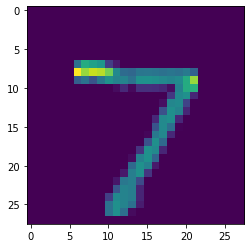

In [26]:
### now to check that our answer is true or not
plt.imshow(x_test[0])

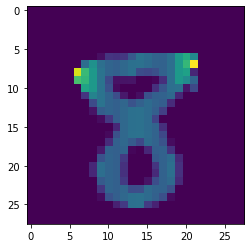

In [27]:
### now to check that our answer is true or not
plt.imshow(x_test[128])

In [83]:
import cv2 ###pip install opencv- python

In [84]:
img = cv2.imread('rk.png')

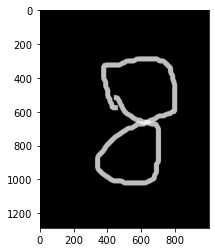

In [85]:
plt.imshow(img)

In [86]:
img.shape

(1287, 1000, 3)

In [87]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [88]:
gray.shape

(1287, 1000)

In [89]:
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)

In [90]:
resized.shape

(28, 28)

In [91]:
newimg = tf.keras.utils.normalize (resized, axis = 1) ### 0 t 1 Scaling

In [92]:
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE,1) #kernal operation of convolution layer

In [93]:
newimg.shape

(1, 28, 28, 1)

In [94]:
predicions = model.predict(newimg)

In [95]:
print (np.argmax(predicions))

5


### try on second image

In [71]:
img = cv2.imread('three.png')

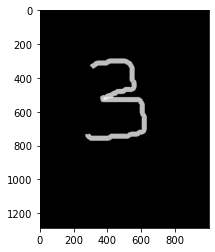

In [72]:
plt.imshow(img)

In [73]:
img.shape

(1287, 1000, 3)

In [74]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [75]:
gray.shape

(1287, 1000)

In [76]:
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)

In [77]:
resized.shape

(28, 28)

In [78]:
newimg = tf.keras.utils.normalize (resized, axis = 1) ### 0 t 1 Scaling

In [79]:
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE,1) #kernal operation of convolution layer

In [80]:
newimg.shape

(1, 28, 28, 1)

In [81]:
predicions = model.predict(newimg)

In [82]:
print (np.argmax(predicions))

3
